In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 1.EDA

#### Выкиньте ненужные признаки: id, name, host_id, host_name, last_review

In [6]:
data = data.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [8]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


У данных признаков `price`,`minimum_nights`,`number_of_reviews`,`reviews_per_month`, `calculated_host_listings_count` сильная разница между `max` и `mean` значениями.  

In [9]:
data[pd.isnull(data.reviews_per_month)]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
19,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
26,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
38,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Пропущены значения для признака `reviews_per_month`

#### Визуализируйте базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots

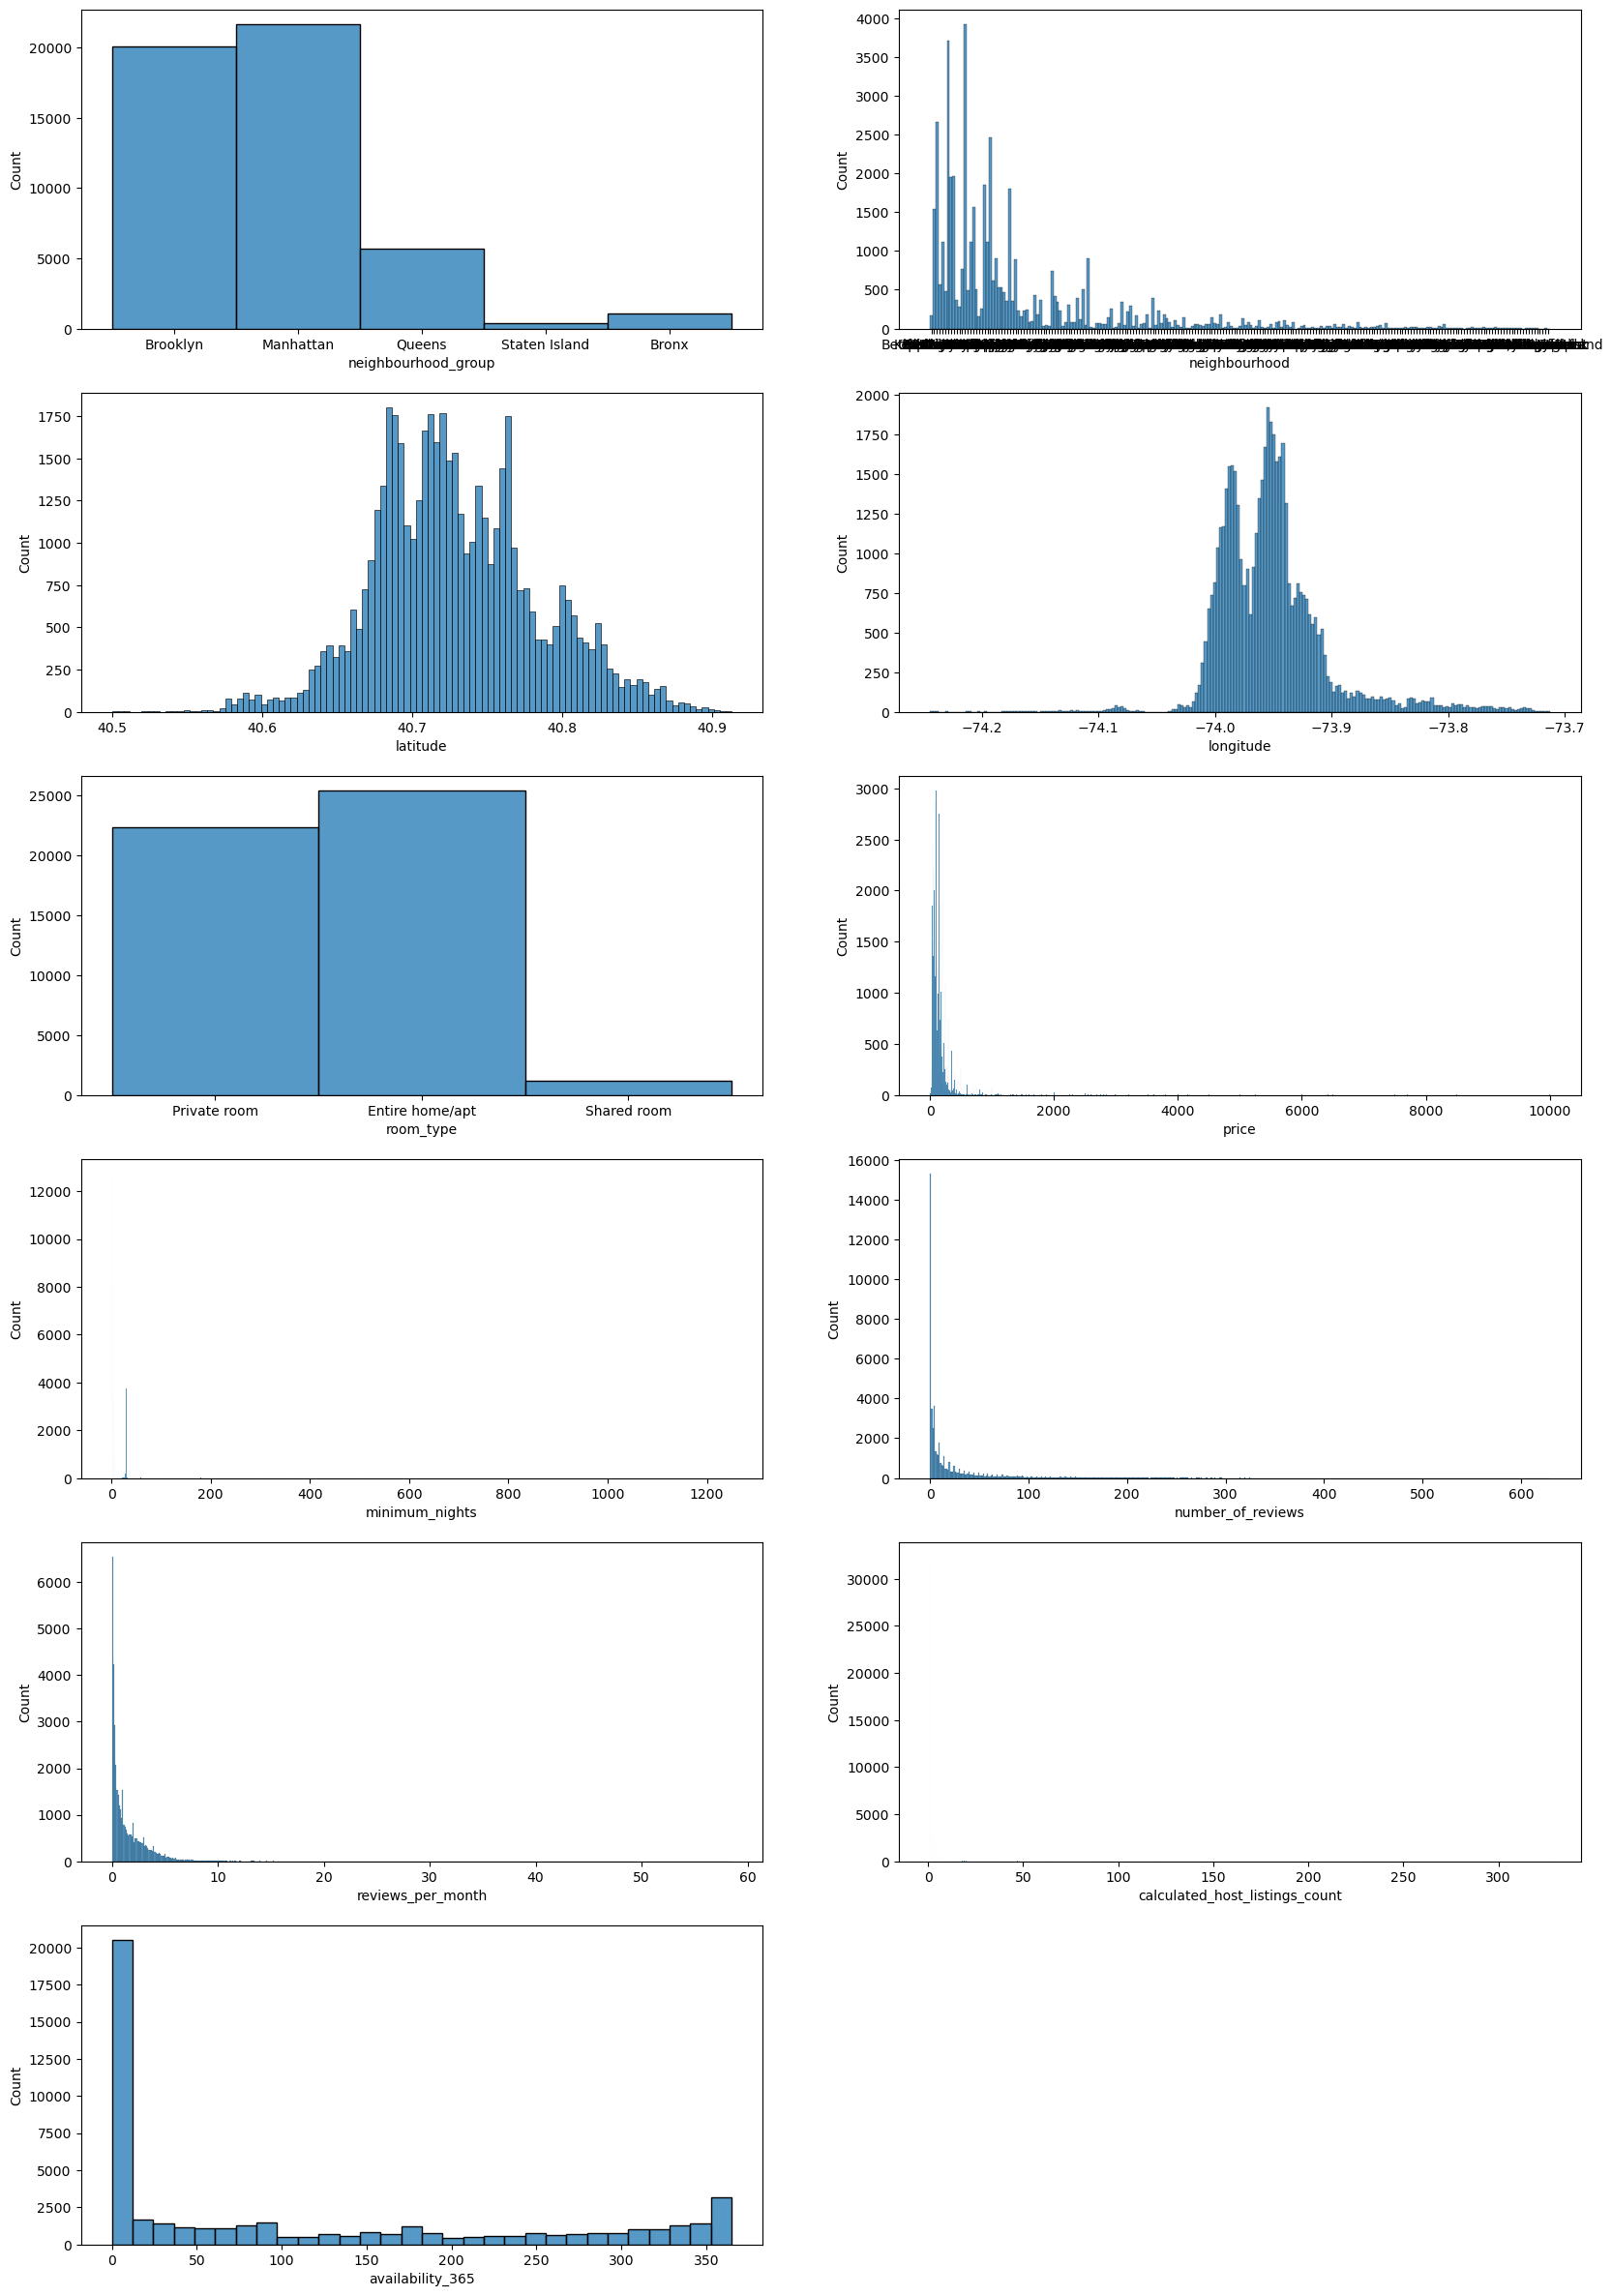

In [10]:
def plot_hists(data_frame, x_size):
    column_count = len(data_frame.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, column in enumerate(data_frame, start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.histplot(data=data, ax=ax, x=column)

plot_hists(data, x_size=2)

У данных признаков `price`,`minimum_nights`,`number_of_reviews`,`reviews_per_month`, `calculated_host_listings_count` присутствуют аномальные значения. Используем правило трех сигм, построим гистограммы по новой.

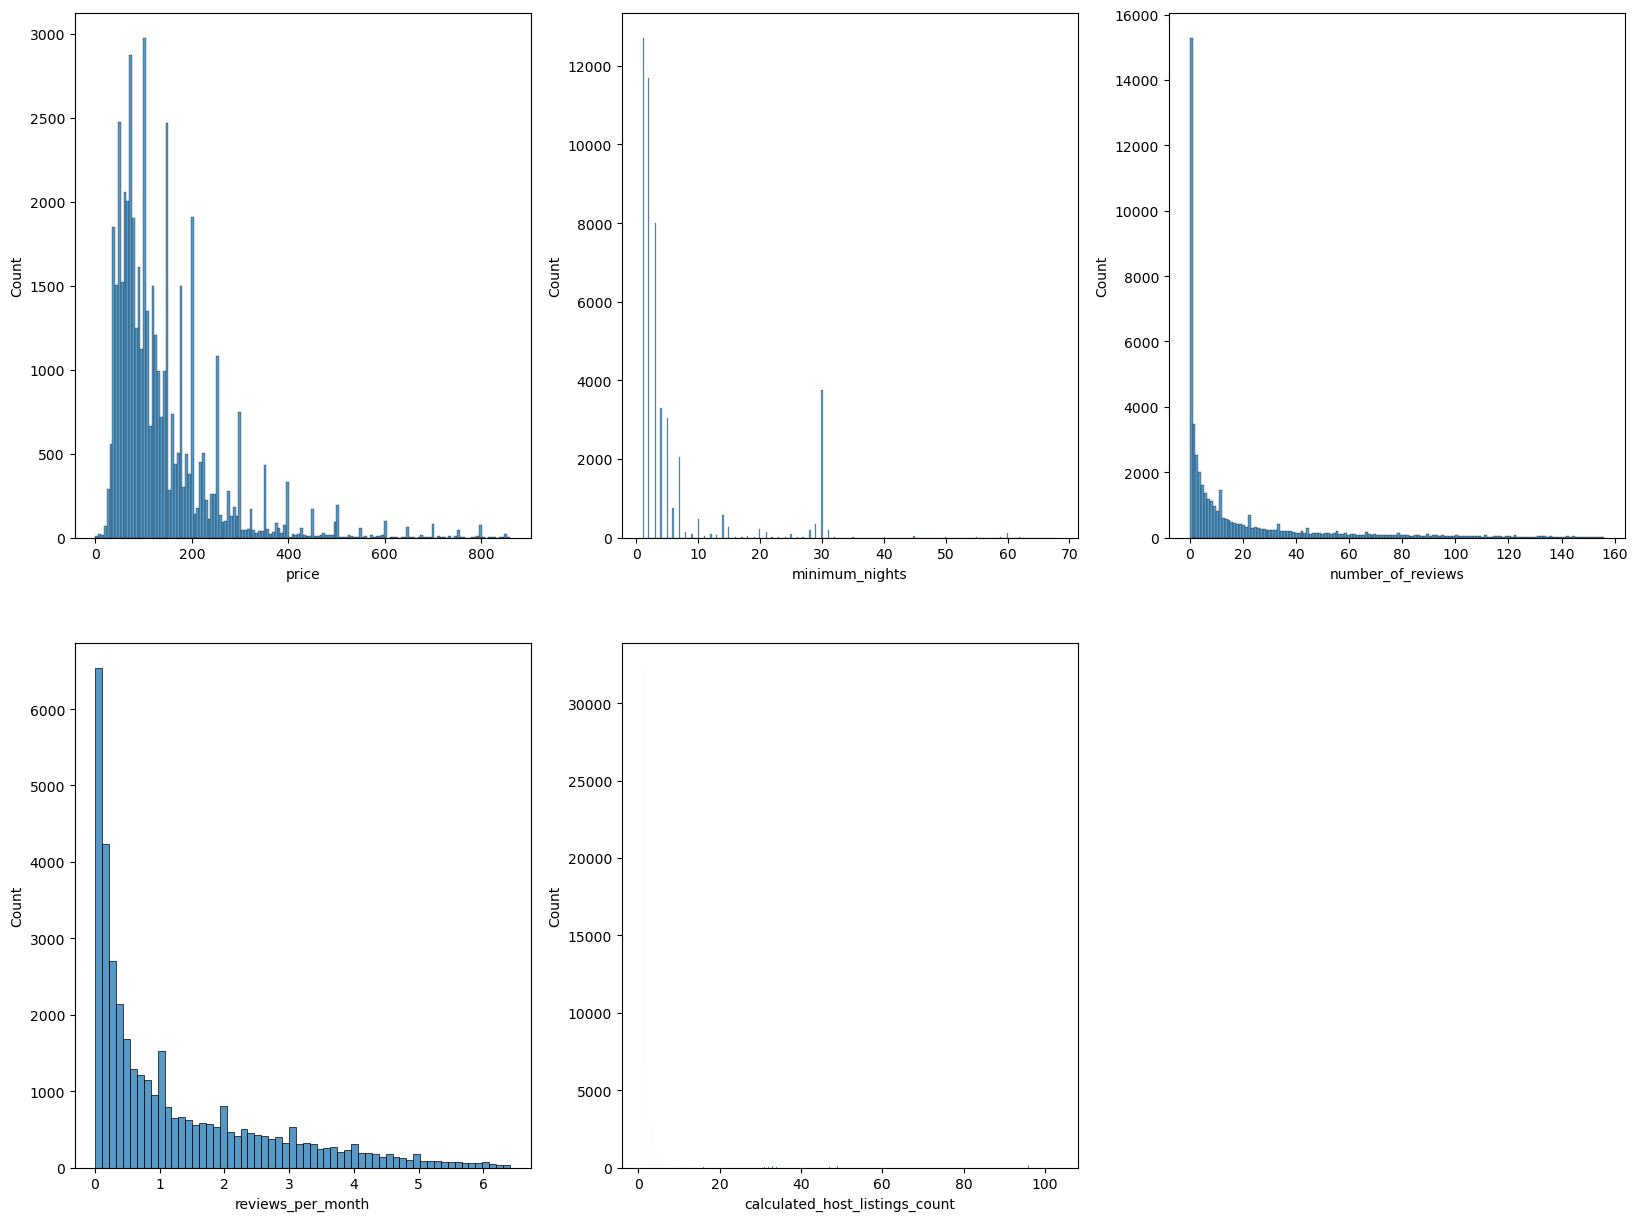

In [12]:
from scipy.stats import zscore

def plot_hists_without_peaks(data_frame, x_size, columns):
    column_count = len(columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 15))

    for index, column in enumerate(columns, start=1):
        values = data_frame[column].dropna()
        ax = figure.add_subplot(line_counts, x_size, index)
        ax.set(xlabel=column)
        sns.histplot(values.where(zscore(values) < 3), ax=ax)

plot_hists_without_peaks(data, x_size=3,
columns=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count'])

In [13]:
data['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

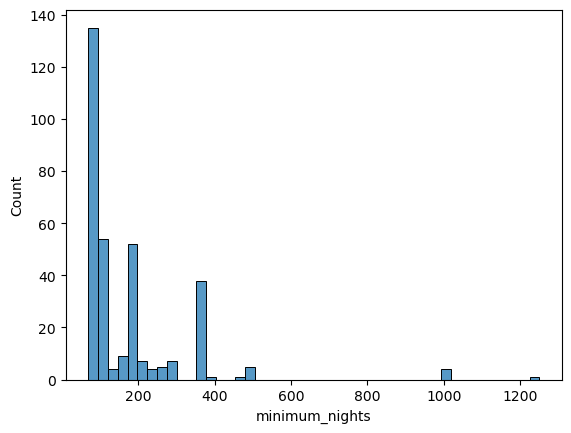

In [14]:
sns.histplot(data['minimum_nights'].where(zscore(data['minimum_nights']) > 3))
plt.show()

In [15]:
data['calculated_host_listings_count'].describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

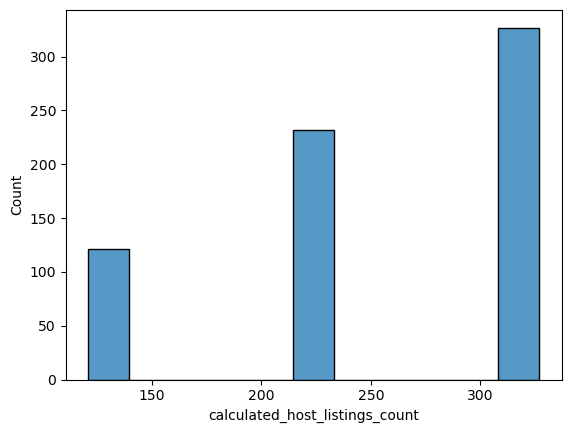

In [16]:
sns.histplot(data['calculated_host_listings_count'].where(zscore(data['calculated_host_listings_count']) > 3))
plt.show()

Признаки `minimum_nights`, `calculated_host_listings_count`имеют большой разброс значений.

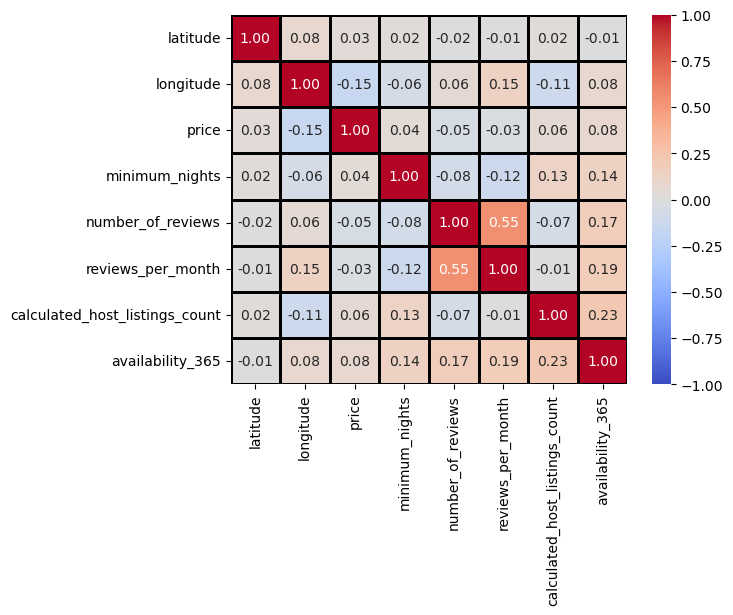

In [17]:
sns.heatmap(data.corr(), annot=True,fmt='.2f', vmin=-1, vmax=1, center=0, linewidth=1, 
            linecolor='black', cmap='coolwarm')
plt.show()

Сильная корреляция присутствует между признаками `number_of_reviews` и `reviews_per_month`

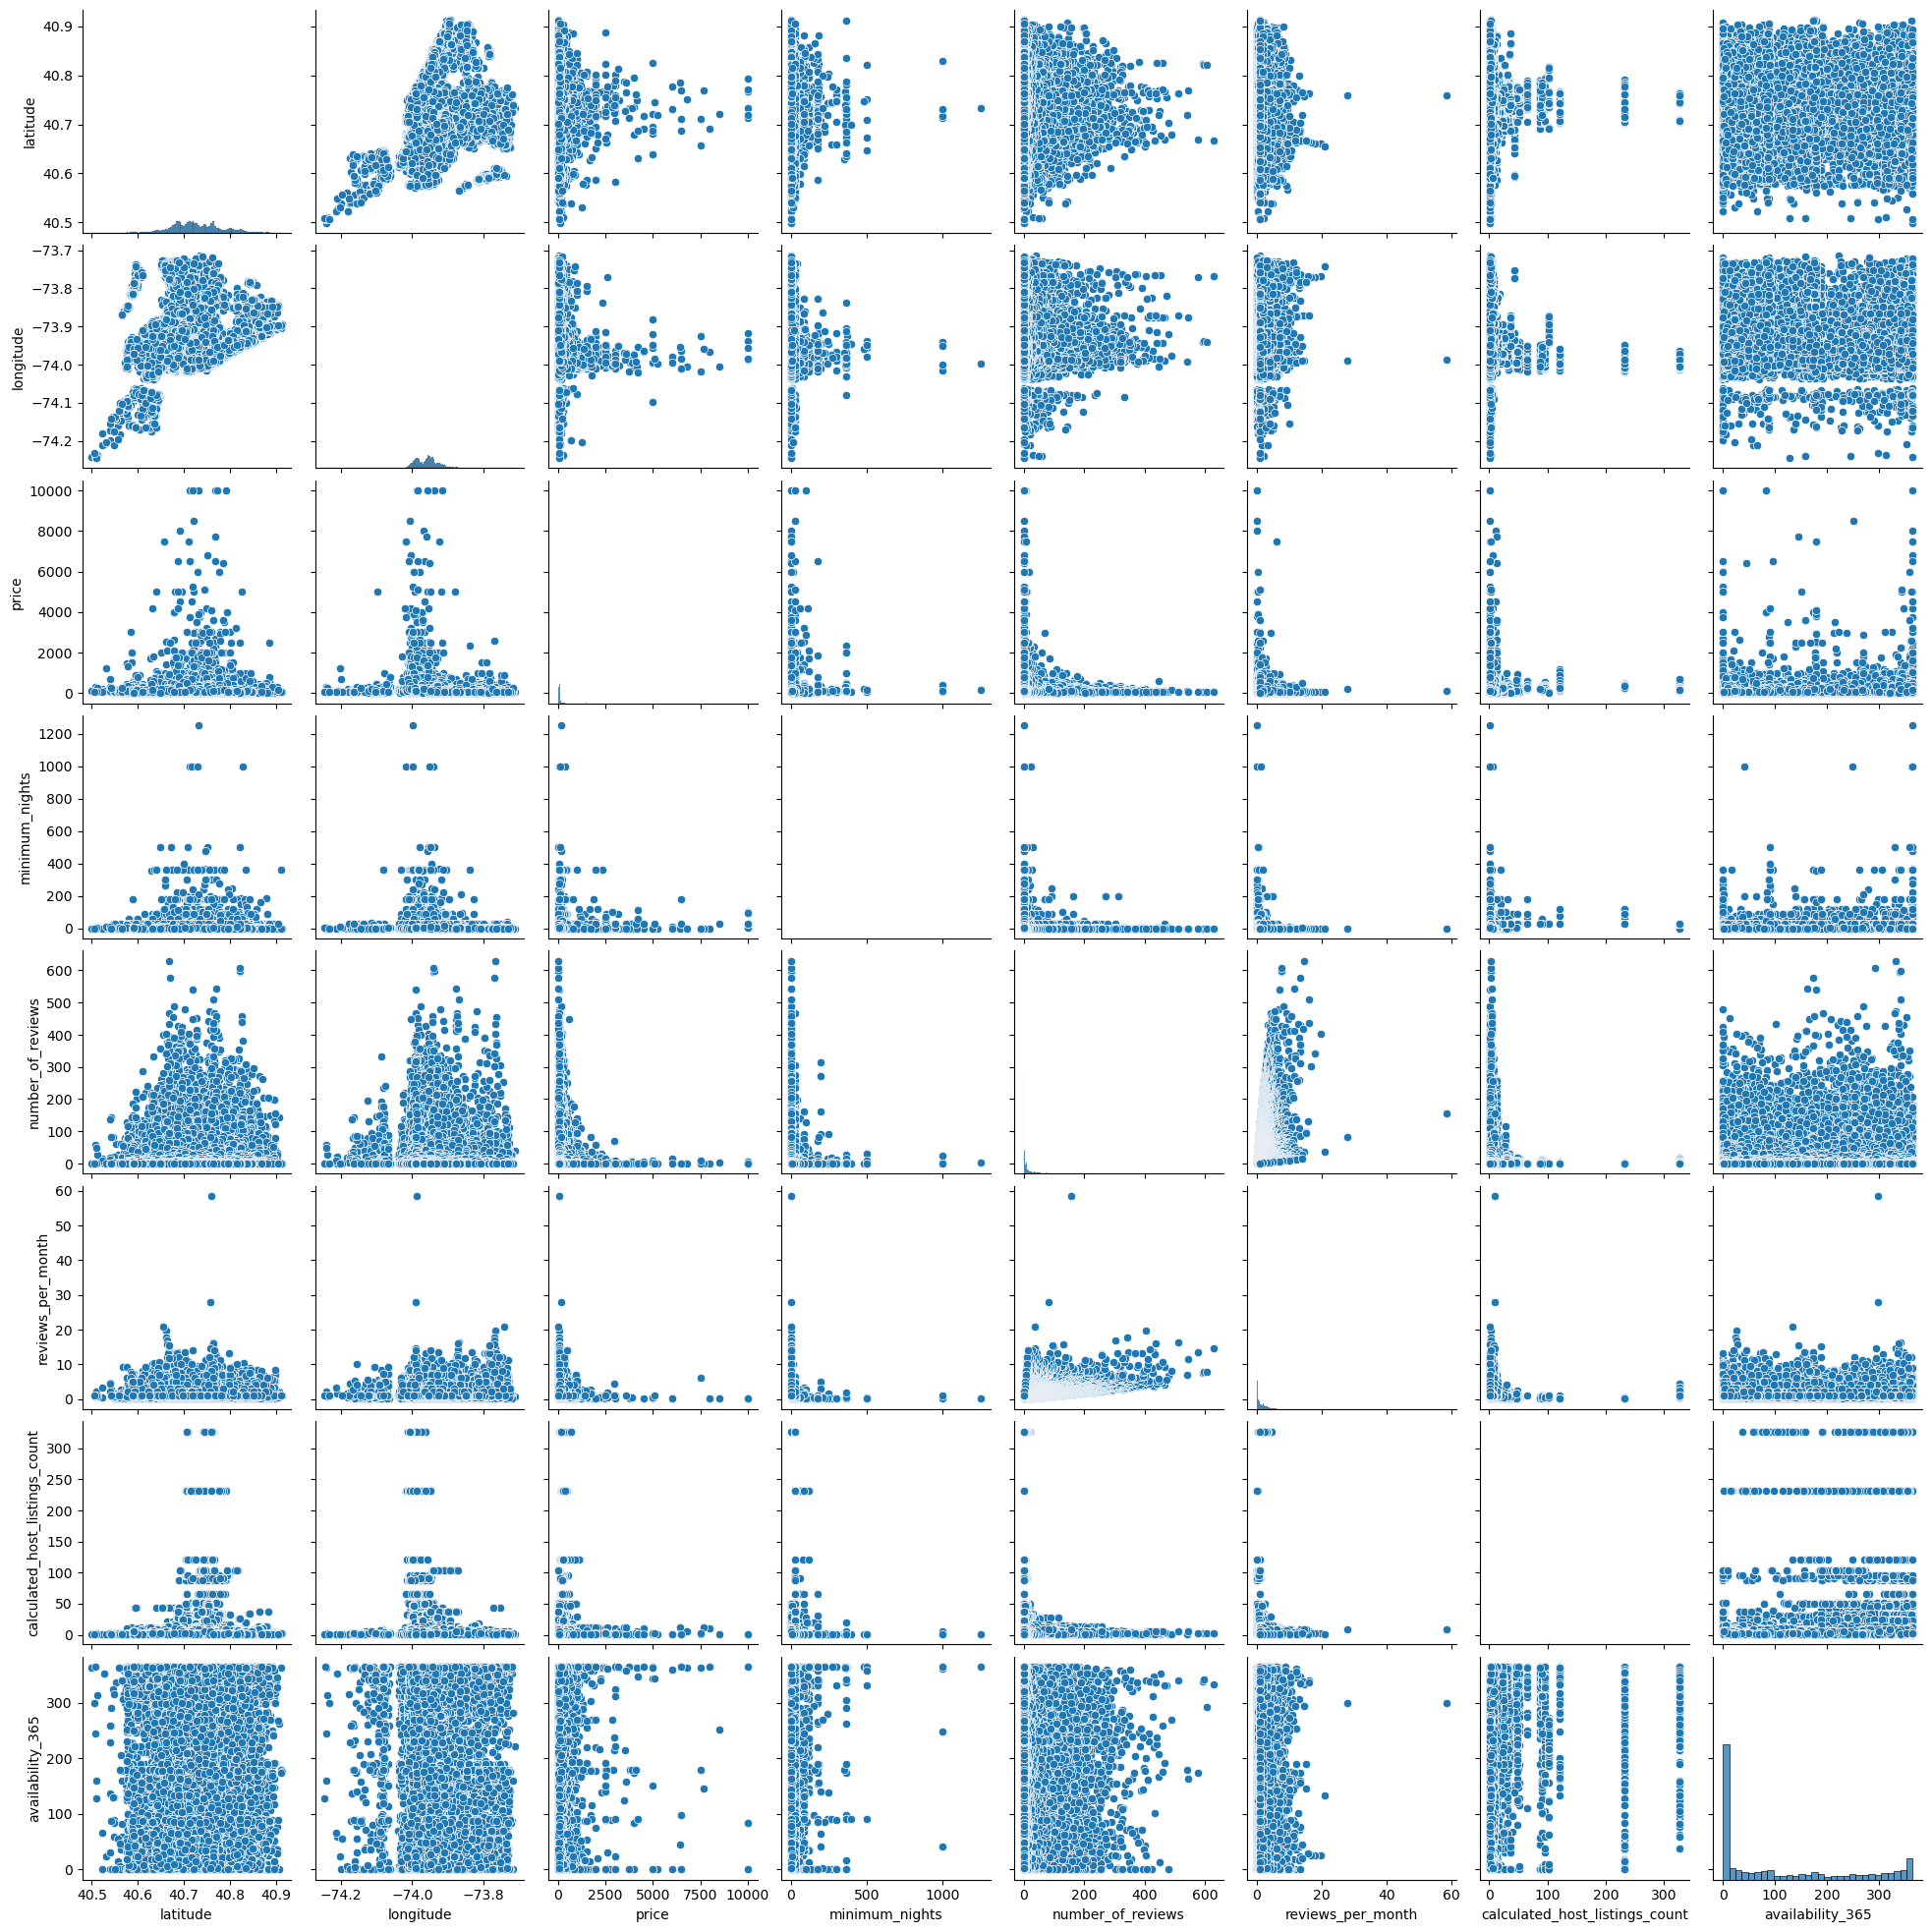

In [18]:
sns.pairplot(data);

## Часть 2. Preprocessing & Feature Engineering


#### По результатам анализа произведите предобработку переменных

Заменяем отсутствующие значения (NaN) на 0 для признака 'reviews_per_month':  

In [19]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

Категориальные значения признака 'room_type' переводим в числовые:

In [20]:
data.loc[:, 'room_type'] = data.room_type.replace({'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2})

In [21]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,1,80,10,9,0.10,1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  int64  
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


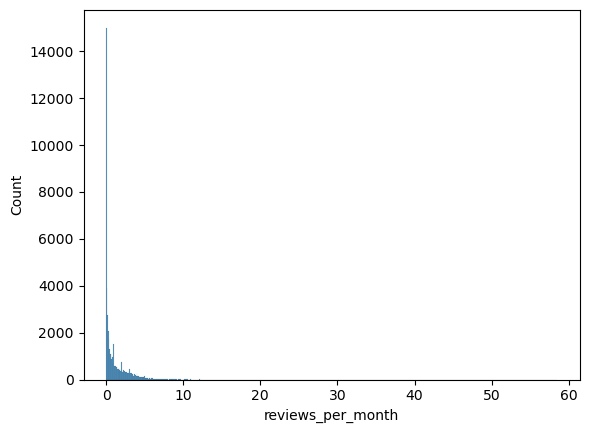

In [23]:
sns.histplot(data, x='reviews_per_month')
plt.show()

#### Обратите внимание на распределение целевой переменной, возможно, с ней тоже можно поработать

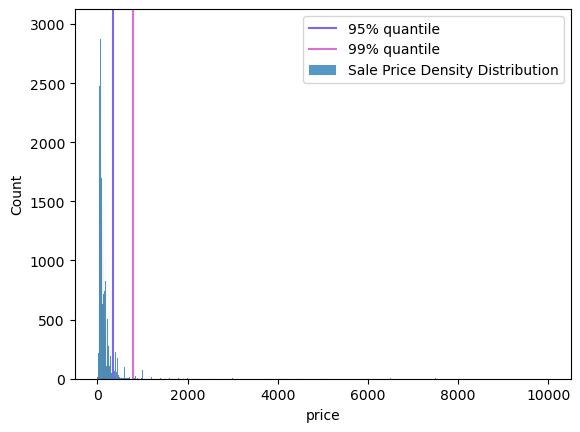

In [24]:
sns.histplot(data['price'], label='Sale Price Density Distribution')
plt.axvline(data.price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(data.price.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

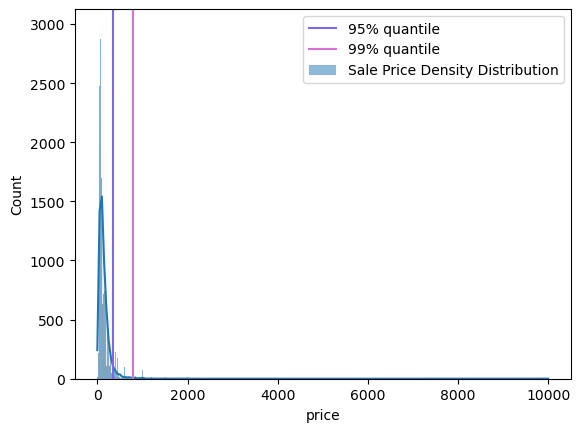

In [25]:
price = data['price'].where(zscore(data['price']) <= 3)
sns.histplot(data['price'], label='Sale Price Density Distribution', kde=True)
plt.axvline(data.price.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(data.price.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

#### Работа с категориальными переменными 

In [26]:
data[['neighbourhood','neighbourhood_group']].nunique()

neighbourhood          221
neighbourhood_group      5
dtype: int64

 Зададим функцию, которая кодирует категориальные признаки выбранным методом.

In [27]:
def encode_func(data, enc, cols = ['neighbourhood','neighbourhood_group']):
    data_enc = data.copy()
    data_enc[cols]= enc.fit_transform(data_enc[cols])
    return data_enc

In [28]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_encoding(data_enc):
    results = {}
    linr = LinearRegression()
    scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]
    for scaler in scalers:
        scaled_data = scaler.fit_transform(data_enc.drop('price', axis = 1))
        linr_r2 = np.mean(cross_val_score(linr, scaled_data, y = data_enc.price, cv = 5, scoring = 'r2'))
        linr_mae = np.mean(cross_val_score(linr, scaled_data, y = data_enc.price, cv = 5, scoring = 'neg_mean_absolute_error'))
        linr_mse = np.mean(cross_val_score(linr, scaled_data, y = data_enc.price, cv = 5, scoring = 'neg_mean_squared_error'))
        print(type(scaler).__name__)
        print('LinearRegression_R2', round(linr_r2,4))
        print('LinearRegression_MAE', round(linr_mae,4))
        print('LinearRegression_MSE', round(linr_mse,4))
    return [linr_r2, linr_mae, linr_mse]

##### OneHotEncoder

In [29]:
!pip install category_encoders

In [33]:
from category_encoders import OneHotEncoder

object_features = list(data.select_dtypes(include=['object']).columns)
enc = OneHotEncoder()
enc.fit_transform(data[['neighbourhood_group', 'neighbourhood']]).head()

,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,...,neighbourhood_212,neighbourhood_213,neighbourhood_214,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data_enc = data.drop(object_features, axis = 1)\
    .join(enc.fit_transform(data[object_features], axis = 0))
data_enc.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,...,neighbourhood_212,neighbourhood_213,neighbourhood_214,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,neighbourhood_221
0,40.64749,-73.97237,0,149,1,9,0.21,6,365,1,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,1,225,1,45,0.38,2,355,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,0,150,3,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,1,89,1,270,4.64,1,194,1,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,1,80,10,9,0.10,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data[['room_type']].value_counts()

room_type
1            25409
0            22326
2             1160
dtype: int64

In [44]:
results = {}

In [45]:
results['One_Hot_encoding'] = evaluate_encoding(data_enc)

MinMaxScaler
LinearRegression_R2 0.0687
LinearRegression_MAE -76.693
LinearRegression_MSE -53702.0182
RobustScaler
LinearRegression_R2 0.0687
LinearRegression_MAE -76.693
LinearRegression_MSE -53702.0182
StandardScaler
LinearRegression_R2 0.0687
LinearRegression_MAE -76.693
LinearRegression_MSE -53702.0182


##### OrdinalEncoder

In [46]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data_enc = encode_func(data, enc)
data_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.0,108.0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,2.0,127.0,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,2.0,94.0,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,1.0,41.0,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,2.0,61.0,40.79851,-73.94399,1,80,10,9,0.10,1,0


In [47]:
results['Ordinal_encoding'] = evaluate_encoding(data_enc)

MinMaxScaler
LinearRegression_R2 0.0687
LinearRegression_MAE -76.693
LinearRegression_MSE -53702.0182
RobustScaler
LinearRegression_R2 0.0687
LinearRegression_MAE -76.693
LinearRegression_MSE -53702.0182
StandardScaler
LinearRegression_R2 0.0687
LinearRegression_MAE -76.693
LinearRegression_MSE -53702.0182


##### CountEncoder

In [48]:
from category_encoders import CountEncoder
enc = CountEncoder()
data_enc = encode_func(data, enc)
data_enc.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,20104,175,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,21661,1545,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,21661,2658,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,20104,572,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,21661,1117,40.79851,-73.94399,1,80,10,9,0.10,1,0


In [49]:
data[['neighbourhood_group','neighbourhood']].value_counts()

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                                           ... 
Staten Island        Richmondtown             1
                     New Dorp                 1
                     Fort Wadsworth           1
                     Willowbrook              1
                     Woodrow                  1
Length: 221, dtype: int64

In [50]:
results['Count_encoding'] = evaluate_encoding(data_enc)

MinMaxScaler
LinearRegression_R2 0.0684
LinearRegression_MAE -77.5072
LinearRegression_MSE -53711.4043
RobustScaler
LinearRegression_R2 0.0684
LinearRegression_MAE -77.5072
LinearRegression_MSE -53711.4043
StandardScaler
LinearRegression_R2 0.0684
LinearRegression_MAE -77.5072
LinearRegression_MSE -53711.4043


Методика шкалирования разницы не имеет, результаты одинаковые.

#### Попробуйте на основании имеющихся переменных создать новые, которые могли бы улучшить качество модели. Например, можно найти координаты Манхэттена (самого дорогого района) и при помощи широты и долготы, а также евклидового расстояния создать новую переменную - расстояние от квартиры до этого района. Возможно, такой признак будет работать лучше, чем просто широта и долгота.

In [51]:
#приготовим функцию для рассчета расстояния до центра манхеттена 40.776676, -73.971321 с помощью формулы Хавершина
manlon=-73.971321
manlat=40.776676
def haversine_np(lon1, lat1):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, manlon, manlat])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [52]:
import copy
data_man=copy.deepcopy(data_enc)
data_man['manhattan_distance']= haversine_np(data_man.longitude,data_man.latitude)
data_man.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,manhattan_distance
0,20104,175,40.64749,-73.97237,0,149,1,9,0.21,6,365,14.356081
1,21661,1545,40.75362,-73.98377,1,225,1,45,0.38,2,355,2.768066
2,21661,2658,40.80902,-73.94190,0,150,3,0,0.00,1,365,4.364068
3,20104,572,40.68514,-73.95976,1,89,1,270,4.64,1,194,10.218430
4,21661,1117,40.79851,-73.94399,1,80,10,9,0.10,1,0,3.342883


In [53]:
results['One_Hot_encoding'] = evaluate_encoding(data_man)
results['Ordinal_encoding'] = evaluate_encoding(data_man)
results['Count_encoding'] = evaluate_encoding(data_man)

MinMaxScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
RobustScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
StandardScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
MinMaxScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
RobustScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
StandardScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
MinMaxScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
RobustScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693
StandardScaler
LinearRegression_R2 0.0742
LinearRegression_MAE -76.7101
LinearRegression_MSE -53382.2693


Качество модели не уличшилось.

## Часть 3. Моделирование

#### Отложите 30% данных для тестирования.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_enc.drop(['price'], axis=1), data_enc['price'], test_size=0.30, random_state=42)

#### Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
#### Измерьте качество каждой и визуализируйте важность признаков.
#### Сделайте интересные выводы :)

In [57]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

results={}
for model in LinearRegression(),Lasso(alpha = 100),Ridge(alpha = 100),ElasticNet(alpha = 100):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    result={}
    result["Test MAE"] = mean_absolute_error(y_test, y_pred)
    result["Train MAE"] = mean_absolute_error(y_train, y_train_pred)
    result["Test MSE"] = mean_squared_error(y_test, y_pred)
    result["Train MSE"] = mean_squared_error(y_train, y_train_pred)
    results[type(model).__name__] = result
pd.DataFrame(results)

,LinearRegression,Lasso,Ridge,ElasticNet
Test MAE,74.786997,85.241046,74.640786,85.267822
Train MAE,79.296890,89.966694,79.220254,89.988139
Test MSE,36438.303723,38778.463159,36576.791800,38774.882656
Train MSE,60920.804520,63355.925064,61120.797377,63334.894405


У `Linear regression`  самые лучшие показатели, регуляризация ситуацию не улучшила. Чем больше `alpha`, тем выше `MAE`, `MSE`.

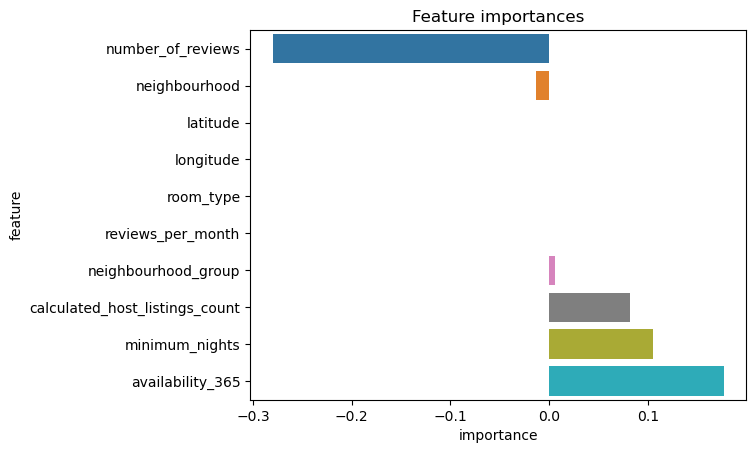

In [64]:
feature_importances = zip(X_train.columns, model.coef_)
feature_importances = sorted(feature_importances, key=lambda x: x[1])
feature_importances = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

plt.title('Feature importances')
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.show()